# Sip & Script - A Data-Driven Journey Through the World of Wine 🍷
## By Arka Ghosh

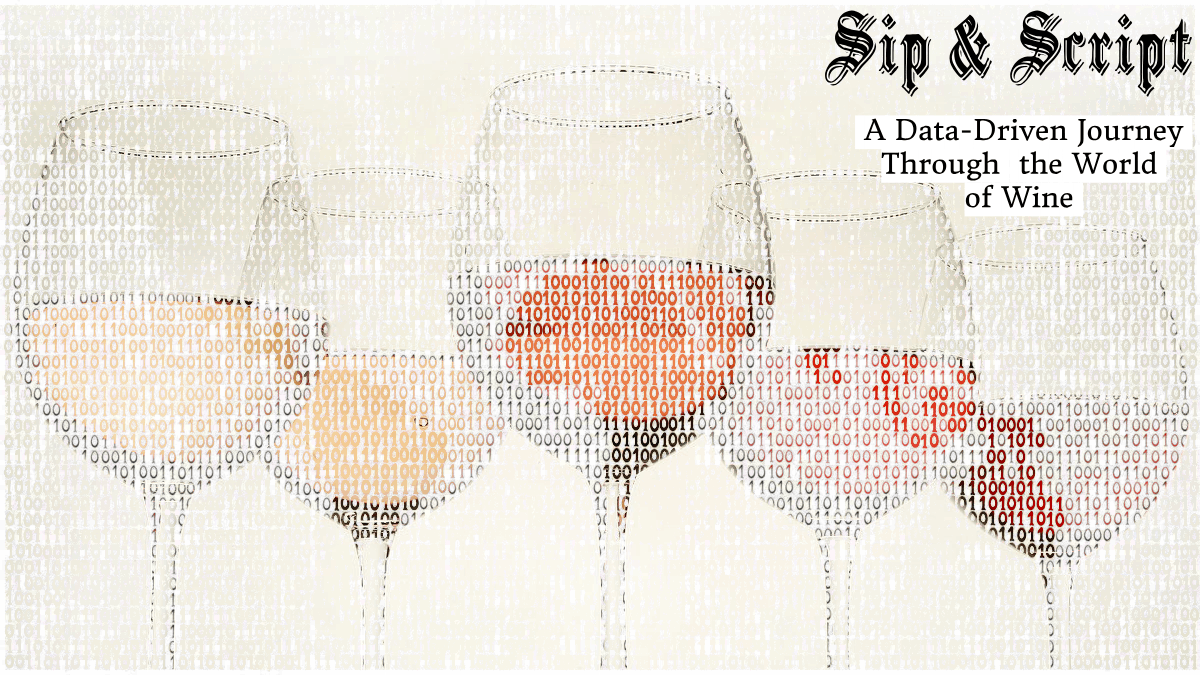

## Introduction
For this project I decided to analyse the Wine Rating dataset found on Kaggle: https://www.kaggle.com/zynicide/wine-reviews using the CRISP-DM Process of:

1. Business Perspective
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy


## Business Perspective
I love wine but am no expert, so I was delighted to learn more about buying the best wine for the best price. Sometimes I walk into the shop and am overcome with concern about how to select the finest bottle of wine for me. It depends on the situation: is this wine for a quiet night in or a gift? Maybe I'm trying to make a good impression with the wine I bring, or perhaps I'm in an awkward restaurant situation with my college crush! To assist consumers like myself in selecting the best wine bottle within our budget, the following questions were asked:

+ Where does the best wine in the world come from?
+  Is Price Related to Quality of Wine ?
* Are there higher-quality wine varieties?
* What is the best wine for each price range?
* Which words are most commonly used while discussing wine?

## 0. Imports

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

## 1. Exploratory Data Analysis (EDA)

### 1.1. Load Data
* I am using the **Wine Rating dataset** available on Kaggle: https://www.kaggle.com/zynicide/wine-reviews

In [ ]:
# read in the dataset
df = pd.read_csv("winemag-data-130k-v2.csv")
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
# Dimension of dataframe e.g. (rows, columns)
df.shape

(129971, 14)

### 1.2. Exploring the data

In [ ]:
# info about datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
# check for duplicate rows
sum(df.duplicated())

0

In [ ]:
# Columns with no missing values.
no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'Unnamed: 0', 'description', 'points', 'title', 'winery'}

In [ ]:
# Total cols - not_null_cols = cols_with_missing_value
missing_cols = set(df.columns) - no_nulls
missing_cols

{'country',
 'designation',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'variety'}

In [ ]:
# Columns with more than 50% of the values missing
most_missing_cols = set(df.columns[df.isnull().mean() > 0.50])
most_missing_cols

{'region_2'}

#### **Initial Observation**

 * I find out that columns such as `Unnamed: 0`, `description`, `points`, `title`, `winery` have no missing values

 * These columns such `country`,
 `designation`,
 `price`,
 `province`,
 `region_1`,
 `region_2`,
 `taster_name`,
 `taster_twitter_handle`,
 `variety` has some missing values.

 * `region_2` is the column that has more than 50% missing value


In [ ]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


#### Observation #01
Here we see the range of points given to a bottle of wine. The minimum is 80 and the max is 100. After a quick google this seems to be a reasonable scale. Using the link here:https://www.wine-searcher.com/critics-17-wine+enthusiast I found that the Wine Enthusiast rates as below:

 - 98–100 – Classic
 - 94–97 – Superb
 - 90–93 – Excellent
 - 87–89 – Very good
 - 83–86 – Good
 - 80–82 – Acceptable

We also see that the minimum price for a bottle of wine is $4. I know the price is in dollars from checking out the Wine Enthuasiast blog where this data was scraped from, the link is here: https://www.winemag.com/?s=&drink_type=wine

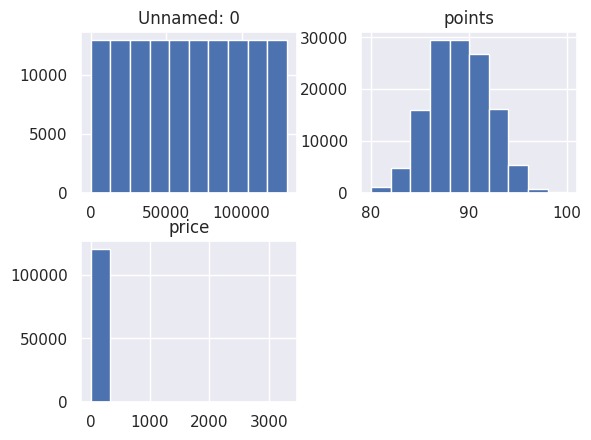

In [ ]:
df.hist();

In [ ]:
# check out the number of reviews per wine country
df.country.value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


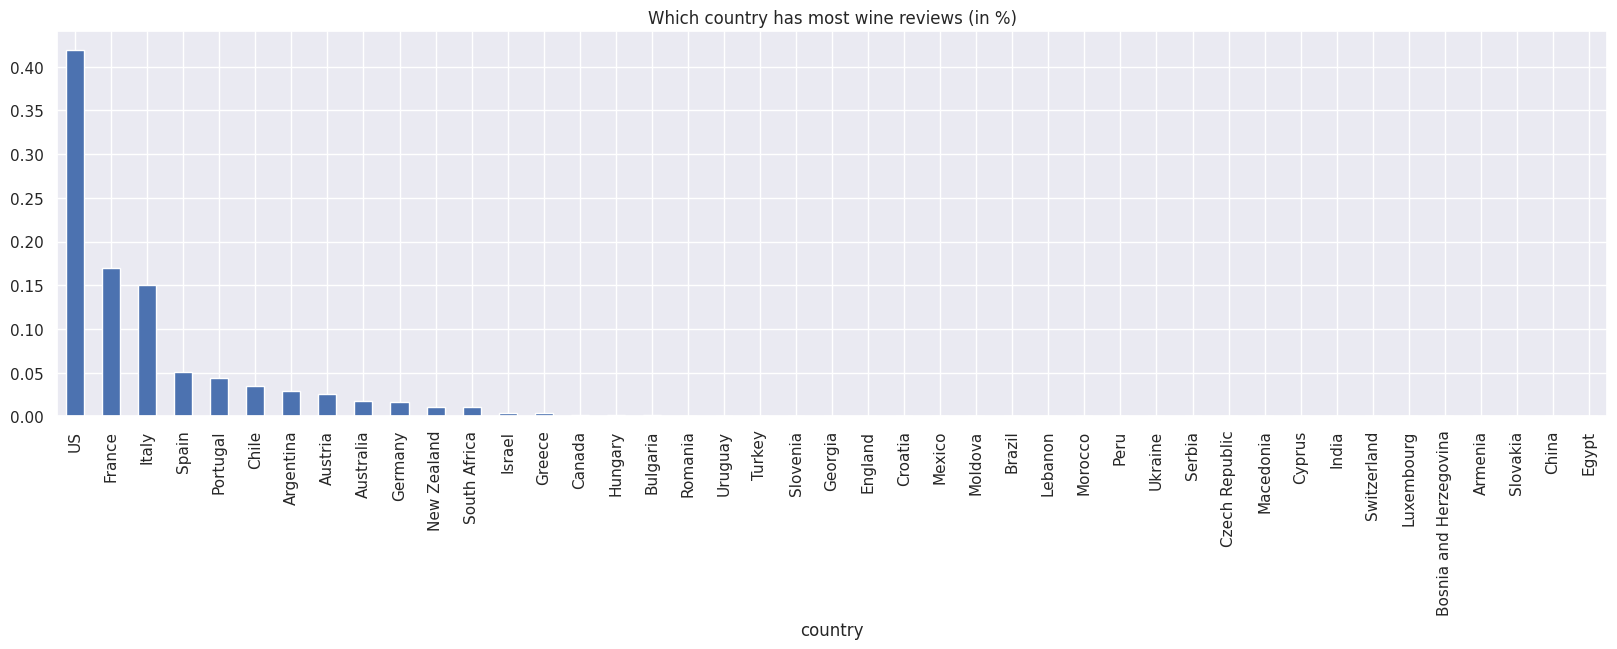

In [ ]:
fig = plt.figure(figsize = (20, 5))
reviews_country=df.country.value_counts()
(reviews_country/df.shape[0]).plot(kind="bar");
plt.title("Which country has most wine reviews (in %)");

#### **Observation #02:**
Majority of wine reviewes are from the US, France, Italy, Spain, Portugal and Chile which isn't too surprising as these countries are known for their wine production.

In [ ]:
df.description

,description
0,"Aromas include tropical fruit, broom, brimston..."
1,"This is ripe and fruity, a wine that is smooth..."
2,"Tart and snappy, the flavors of lime flesh and..."
3,"Pineapple rind, lemon pith and orange blossom ..."
4,"Much like the regular bottling from 2012, this..."
...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...
129967,Citation is given as much as a decade of bottl...
129968,Well-drained gravel soil gives this wine its c...
129969,"A dry style of Pinot Gris, this is crisp with ..."


In [ ]:
# Check the varities of wine
df.variety.value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


#### **Observation #03**
When assessing the dataset, it looks relatively clean with only a few issues i'd like to fix before moving on to analysing, modelling and visualising. I've made a note of the issues i'll deal with during cleaning:


### 1.3. Data Cleaning

The first step of the cleaning process is to make a copy of the DataFrame. Then for each of the issues identified in the wrangling stage we will go through the process of defining the issue and how to fix it, coding a fix, test that it worked.

In [ ]:
# Making a copy
df1 = df.copy()
df1

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
print("Total Rows: {}".format(len(df1['region_2'])))

Total Rows: 129971


In [ ]:
print("Missing Val Rows: {}".format(df1['region_2'].isnull().sum()))

Missing Val Rows: 79460


In [ ]:
print("Missing Val Rows: {}".format(df1['region_2'].isna().sum()))

Missing Val Rows: 79460


In [ ]:
print("Valid Rows: {}".format(len(df1['region_2']) - df1['region_2'].isnull().sum()))

Valid Rows: 50511


In [ ]:
print("Percentage of missing rows: {}".format(df1['region_2'].isnull().mean()))

Percentage of missing rows: 0.6113671511337144


#### **Observation #04**

`region_2` is more than **61.13%** empty and `Unnamed: 0`, `taster_name`,`taster_twitter_handle`, `designation` columns don't contribute anything useful to the listed questions and analysism hence they could be dropped

In [ ]:
# drop the missing columns
df1 = df1.drop(['Unnamed: 0','region_2', 'taster_name', 'taster_twitter_handle', 'designation'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   title        129971 non-null  object 
 7   variety      129970 non-null  object 
 8   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [ ]:
# proportion of price non null
prop_price = df1.price.count()/df1.shape[0]
prop_price

0.9307845596325334

In [ ]:
df1['price'].isnull().sum()

8996

In [ ]:
# proportion of region_1 non null
prop_reg1 = df1.region_1.count()/df1.shape[0]
prop_reg1

0.8365250709773718

In [ ]:
# Parcentage of missing values in region_1 column
df1['region_1'].isnull().mean()

0.1634749290226281

In [ ]:
1 - df1['region_1'].isnull().mean()

0.8365250709773719

In [ ]:
df1['region_1'].isnull().sum()

21247

In [ ]:
# number of missing rows for region_1
missing_reg1 = 129971 - 108724
missing_reg1

21247

#### **Observation #05**
`price` and `region_1` are two cols with the most missing rows **8996** & **21247** respectively. So if I delete entries with null values accorsing to the `price` column, **93%** of the rows still remain for all other cols. I'm comfortable eliminating these from such a large dataset.

In [ ]:
# drop only the rows with missing values in columns country, price, variety, province
df1 = df1.dropna(how='any', subset=['country', 'price', 'variety', 'province'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   region_1     101400 non-null  object 
 6   title        120915 non-null  object 
 7   variety      120915 non-null  object 
 8   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ MB


In [ ]:
no_nulls = set(df1.columns[df1.isnull().mean()==0])
no_nulls

{'country',
 'description',
 'points',
 'price',
 'province',
 'title',
 'variety',
 'winery'}

In [ ]:
# Only col with missing rows
missing_cols = set(df1.columns) - no_nulls
missing_cols

{'region_1'}

In [ ]:
df_cleaned = df1.copy()
df_cleaned

,country,description,points,price,province,region_1,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### 1.4. Visualisation

 let's look at the distribution of the points given to the wines in the dataset as this is a feature of interest in my analysis.

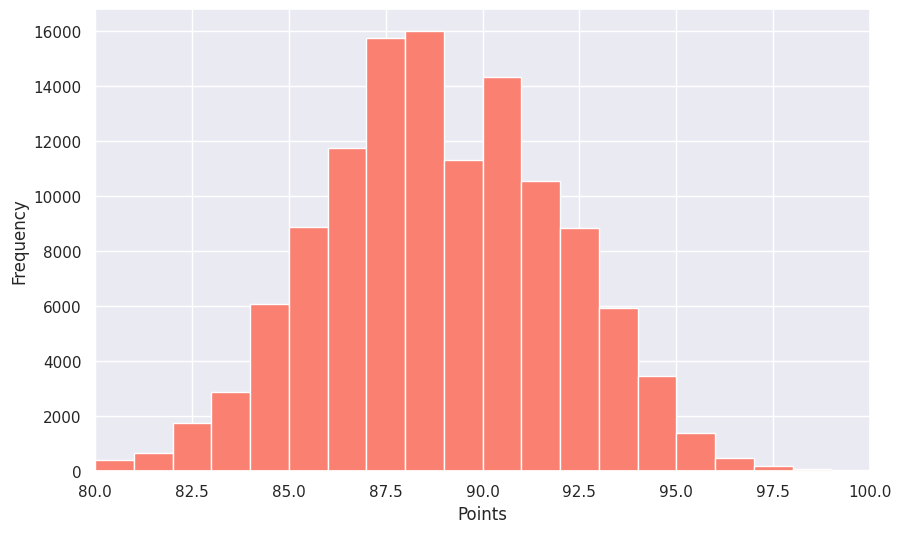

In [ ]:
# plot the distribution of points
plt.figure(figsize=(10,6))
bin_edges = np.arange (80, df_cleaned['points'].max()+1, 1)
plt.hist(data = df_cleaned, x = 'points', bins = bin_edges, color = 'salmon')
plt.xlim(80,100)
plt.xlabel('Points')
plt.ylabel('Frequency');

#### **Observation #06**
As shown from the above plot, there is approximately a normal distribution of points ranging from 80-100.

## 2. Questions

### 2.1. Where does the best wine in the world come from?

In [ ]:
# top 10 wine producing countries
country_most = df1.country.value_counts()[:10]
country_most

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


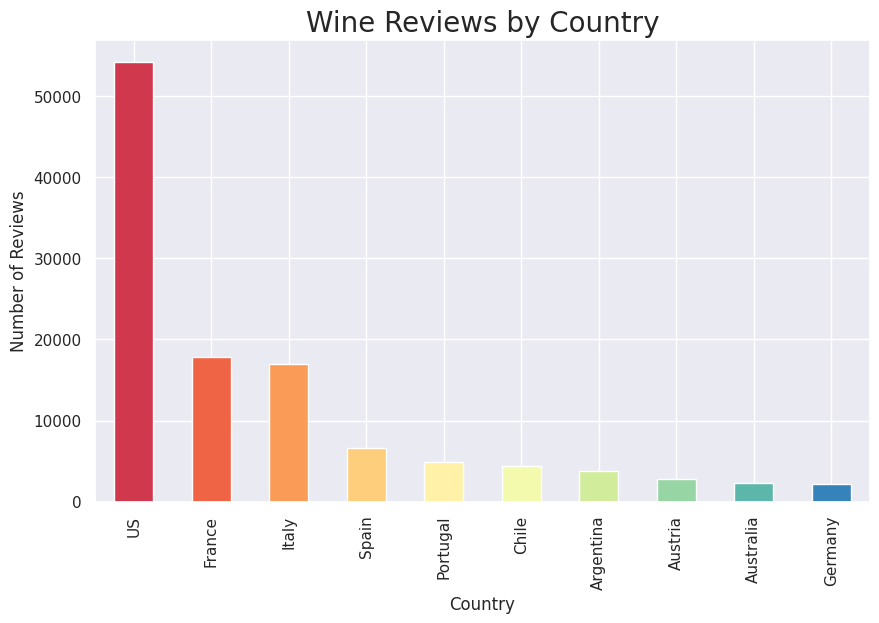

In [ ]:
# plotting the countries with the most wine produced according to the dataset
plt.figure(figsize=(10,6))
country_most.plot(kind='bar', color = sns.color_palette("Spectral", n_colors=10))
plt.title('Wine Reviews by Country', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Number of Reviews');

**Observation #7**: The graph above shows that the top ten wine-producing countries are the United States, France, Italy, Spain, Portugal, Chile, Argentina, Austria, Australia, and Germany. Now let's see how many countries produce wine of the highest quality, according to our assessments.

In [ ]:
# Group numerical variables by country
# df2 = df1.groupby('country').agg('mean') #ERROR

In [ ]:
print(df1.dtypes)

country         object
description     object
points           int64
price          float64
province        object
region_1        object
title           object
variety         object
winery          object
dtype: object


In [ ]:
# Group numerical variables by country
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns
df_temp = df1.groupby('country')[numeric_columns].mean()

In [ ]:
df_temp

,points,price
country,,
Argentina,86.710330,24.510117
Armenia,87.500000,14.500000
Australia,88.595466,35.437663
Austria,90.190782,30.762772
Bosnia and Herzegovina,86.500000,12.500000
Brazil,84.659574,23.765957
Bulgaria,87.936170,14.645390
Canada,89.377953,35.712598
Chile,86.495130,20.787316


In [ ]:
# Create df_ten_countries with 10 countries with most average points
df_ten_countries = df_temp.sort_values(by='points', ascending=False)[:10]
df_ten_countries

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598
Hungary,89.165517,40.648276
China,89.000000,18.000000
France,88.734867,41.139120
Luxembourg,88.666667,23.333333


In [ ]:
# convert countries to series for plotting
y_vals = df_ten_countries.index.to_series()
y_vals

,country
country,
England,England
India,India
Austria,Austria
Germany,Germany
Canada,Canada
Hungary,Hungary
China,China
France,France
Luxembourg,Luxembourg


In [ ]:
# get points as the x-variable
x_vals = df_ten_countries['points']
x_vals

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


<ipython-input-419-ffe4b758b3f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_vals, y=y_vals, palette='Spectral')


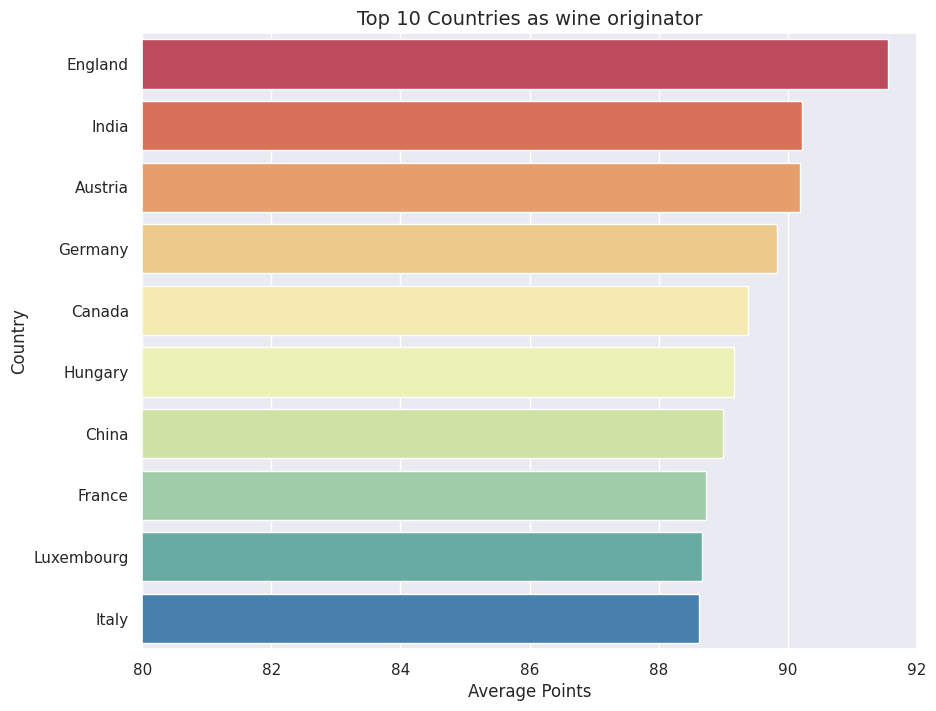

In [ ]:
plt.figure(figsize=(10,8))
plt.xlim(80, 92)
sns.barplot(x=x_vals, y=y_vals, palette='Spectral')
plt.title('Top 10 Countries as wine originator', fontsize = 14)
plt.xlabel('Average Points')
plt.ylabel('Country');

#### **Observation #08**
Surprisingly, when it comes to the highest average points per country, England produces the best quality wine. This could be because there are fewer wines from England in the dataset, and they scored high, boosting the mean. It is worthwhile to delve into this further; let us look at those with scores of 95 or more, which are considered exceptional wines according to the Wine Enthusiast Rating system.


In [ ]:
df1.points.describe()

,points
count,120915.000000
mean,88.421726
std,3.044954
min,80.000000
25%,86.000000
50%,88.000000
75%,91.000000
max,100.000000


In [ ]:
# Points >= 95
high_pointers = df1[df1['points']>=95]
high_pointers

,country,description,points,price,province,region_1,title,variety,winery
345,Australia,This wine contains some material over 100 year...,100,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
346,Australia,"This deep brown wine smells like a damp, mossy...",98,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",97,775.0,Rheingau,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil
348,Australia,Deep mahogany. Dried fig and black tea on the ...,97,100.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards
349,Australia,"RunRig is always complex, and the 2012 doesn't...",97,225.0,South Australia,Barossa,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck
...,...,...,...,...,...,...,...,...,...
128270,US,"Monumentally detailed, this 100% Cabernet Sauv...",97,65.0,California,St. Helena,Redmon 2006 Cabernet Sauvignon (St. Helena),Cabernet Sauvignon,Redmon
128271,Spain,"Concentrated to the hilt, with molten black fr...",96,82.0,Northern Spain,Rioja,Remírez de Ganuza 2005 Old Vines Unfiltered (...,Tempranillo Blend,Remírez de Ganuza
128682,US,Easy to like a lot now for its terrifically ri...,95,38.0,California,Russian River Valley,Dutton Estate 2007 Dutton Ranch Karmen Isabell...,Pinot Noir,Dutton Estate
128683,US,"Big, powerful, soft, rich and ageable. In othe...",95,90.0,California,Carneros,Etude 2006 Heirloom Estate Grown Pinot Noir (C...,Pinot Noir,Etude


In [ ]:
# number of wines from each country scoring the highest ratings of 95-100 points
high_pointers.country.value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


In [ ]:
# number of wines from each country in the dataset
df1.country.value_counts()

42

#### **Observation #09**

As shown above, the countries who received a 95-100 point rating for their wines deviate from our plot of the greatest scorers based on averages. A barplot will show us the maximum, minimum, and mean scores for each country in the dataset, providing a clearer understanding of which countries scored the most points. Because this dataset comprises more US wines, it is expected that there will be a diverse range of wines from the country, whereas England, which obtained the highest average score, has fewer wines in the dataset, creating an unfair comparison.

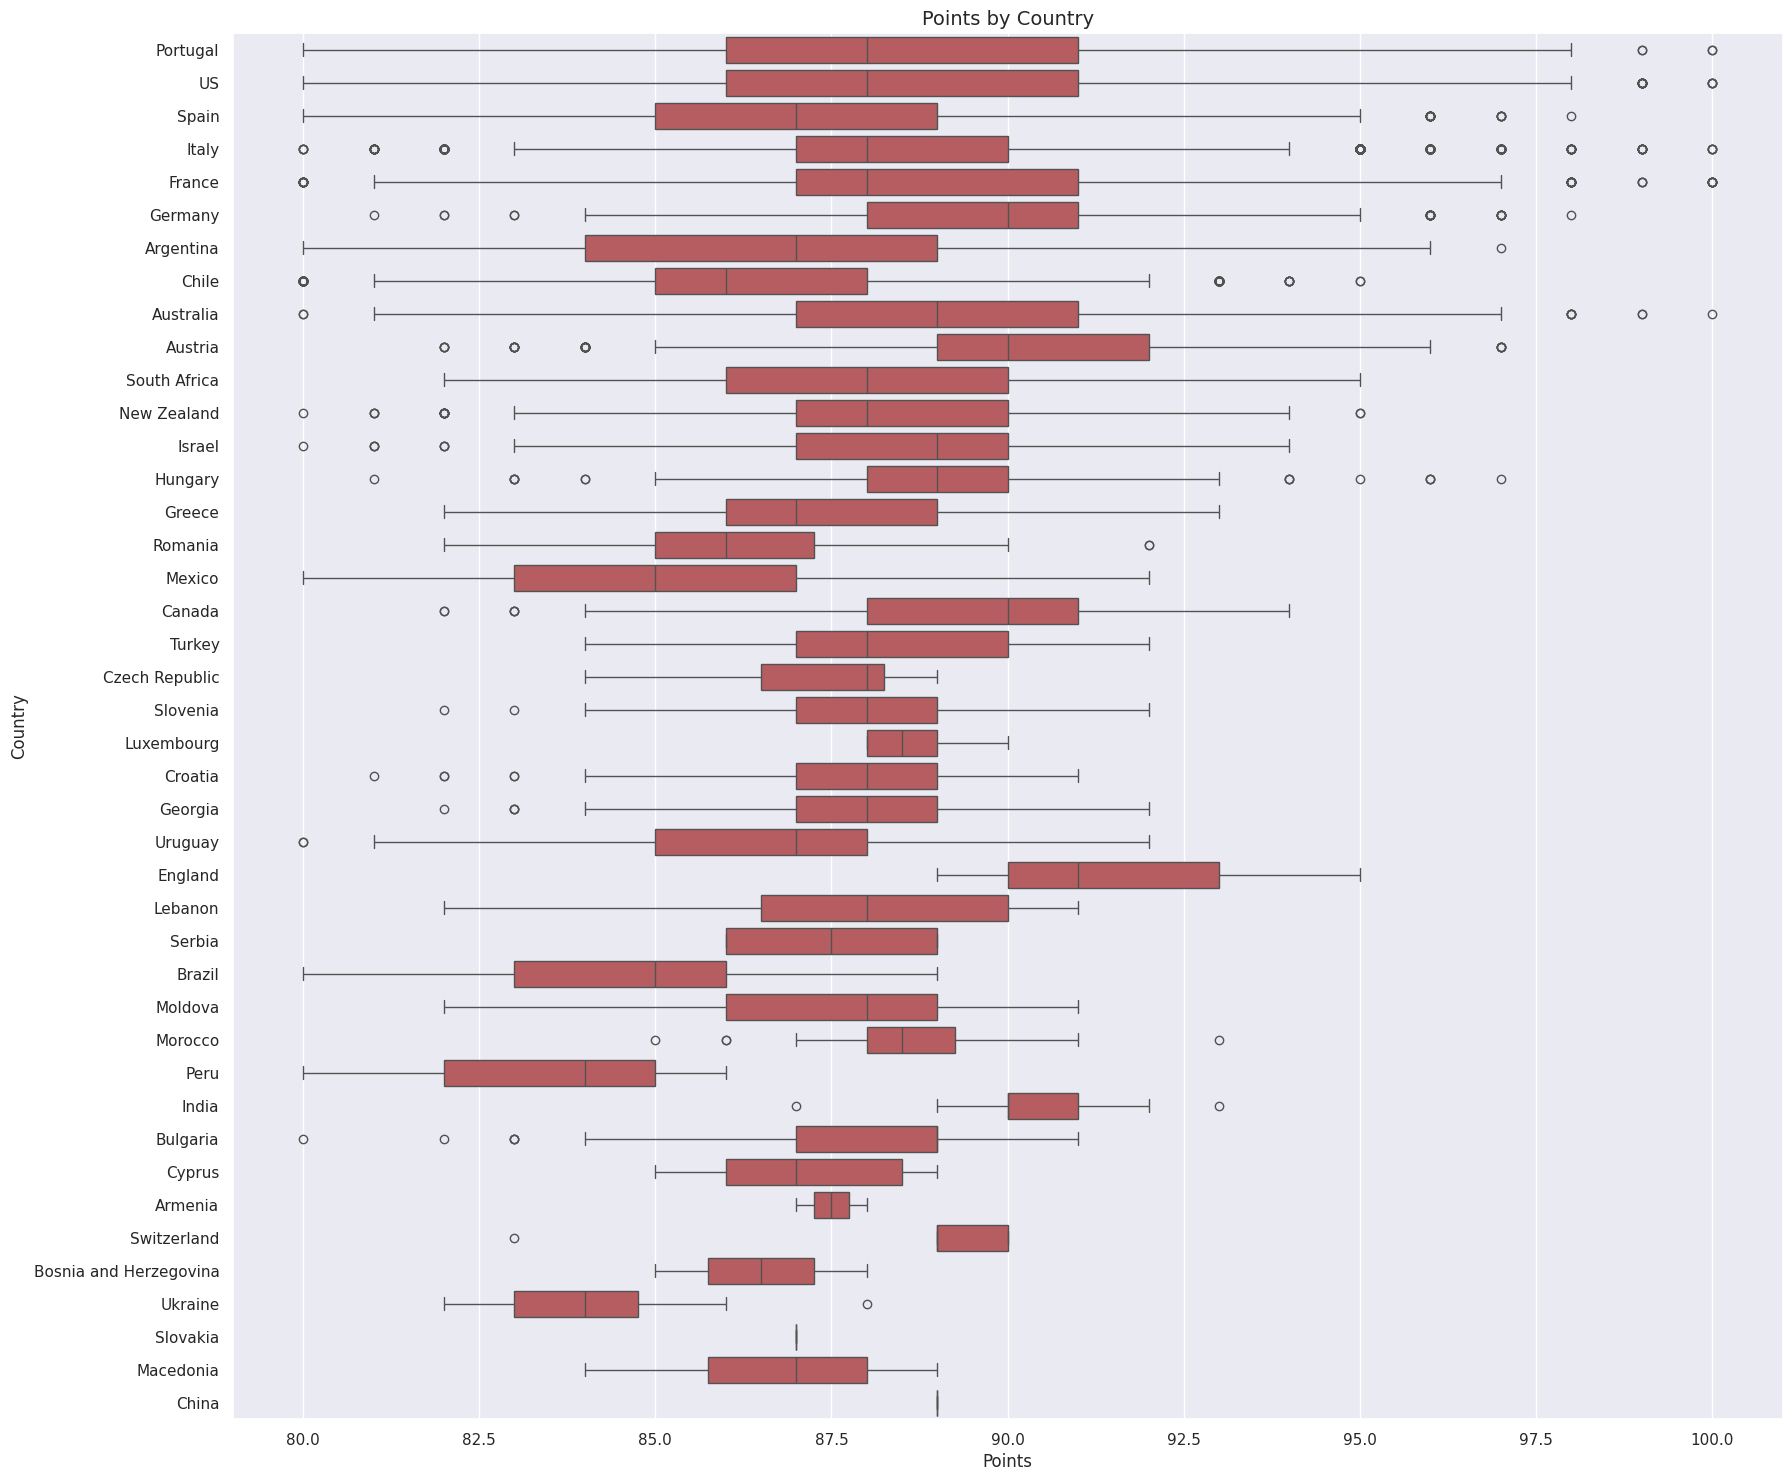

In [ ]:
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[3]
sns.boxplot(data = df1, x = 'points', y = 'country', color = base_color)
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

#### **Observation #10**

The boxplot above clearly shows that, while wines from England had the greatest average points, wines from Portugal, the United States, Italy, France, and Australia achieved perfect scores of 100. There are significantly more wines from these nations in the dataset, thus the scores they obtained are more diverse.

In [ ]:
# count of province
wine_prov = df1.province.value_counts()[:10]
wine_prov

,count
province,
California,36104
Washington,8583
Oregon,5359
Tuscany,5128
Bordeaux,4002
Northern Spain,3797
Mendoza Province,3226
Burgundy,3106
Piedmont,3089


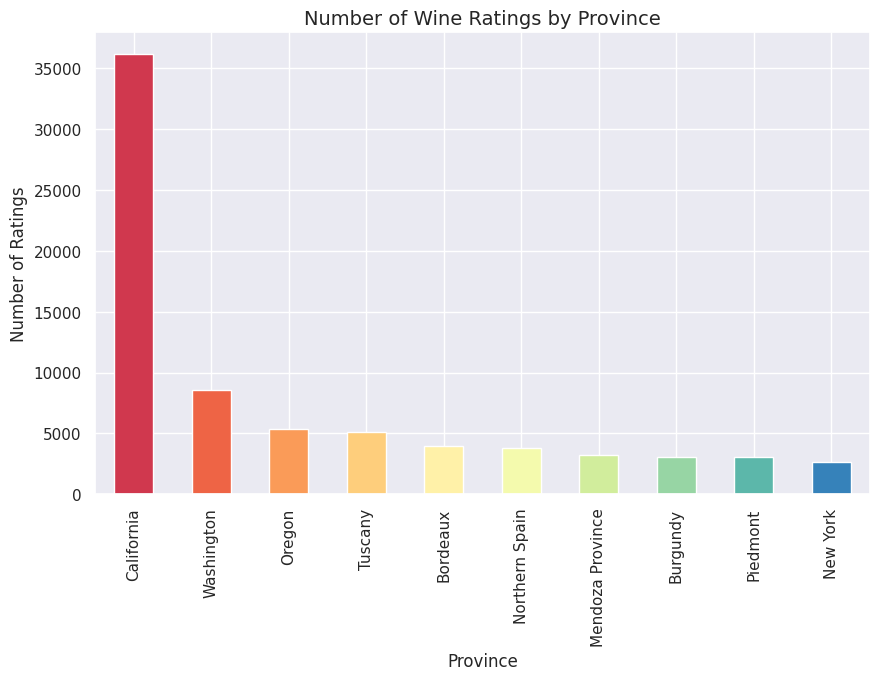

In [ ]:
plt.figure(figsize=(10,6))
wine_prov.plot(kind='bar', color = sns.color_palette("Spectral", n_colors=10))
plt.title('Number of Wine Ratings by Province', fontsize = 14)
plt.xlabel('Province')
plt.ylabel('Number of Ratings');

#### **Observation #11**

The most popular province in this dataset is California. The United States received the most reviews, so it was unsurprising that California had the most wine reviews.

Now that we've seen how the quality of wine varies by region, let's look at the prices of wine from various countries.

<ipython-input-308-882e74c763a1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_val, y=y_val, palette='Greens_r')


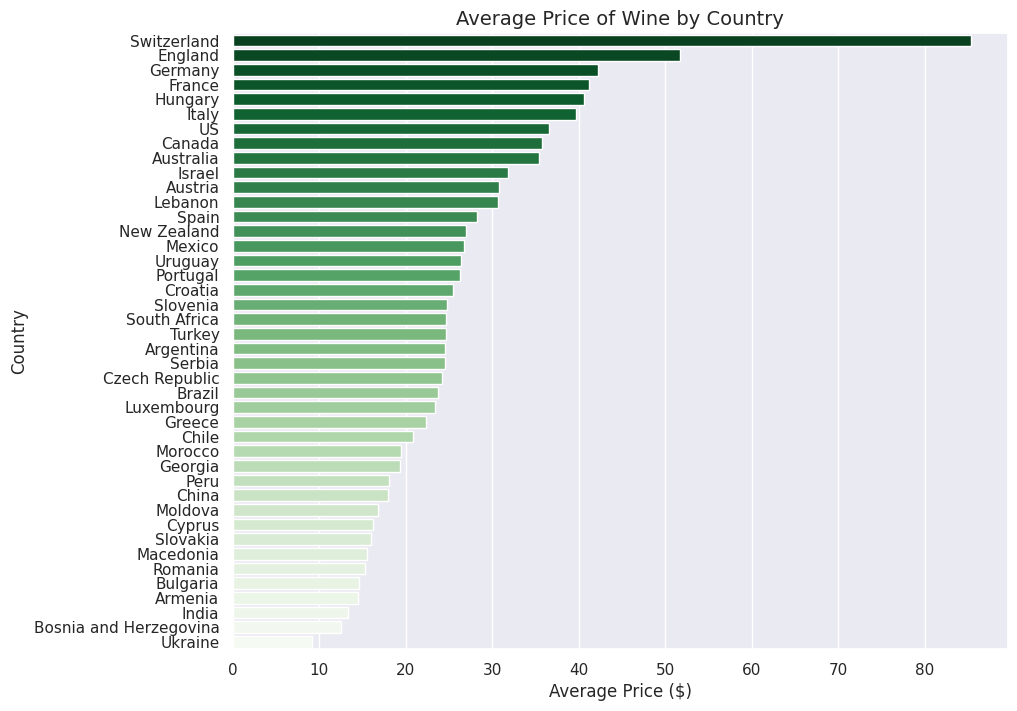

In [ ]:
# df4 = df1.groupby('country').agg('mean')
# df5 = df4.sort_values(by='price', ascending=False)

numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns
df_temp = df1.groupby('country')[numeric_columns].mean()
df5 = df_temp.sort_values(by='price', ascending=False)

y_val = df5.index.to_series()
x_val = df5['price']

plt.figure(figsize=(10,8))
sns.barplot(x=x_val, y=y_val, palette='Greens_r')
plt.title('Average Price of Wine by Country', fontsize = 14)
plt.xlabel('Average Price ($)')
plt.ylabel('Country');

#### **Observation #12**

Switzerland produces the most costly wine, with the average price being over $80 for a bottle. Wine from Ukraine is on the other end of the spectrum with the average price being under just 10 dollars.

### 2.2. Is Price Related to Quality of Wine?

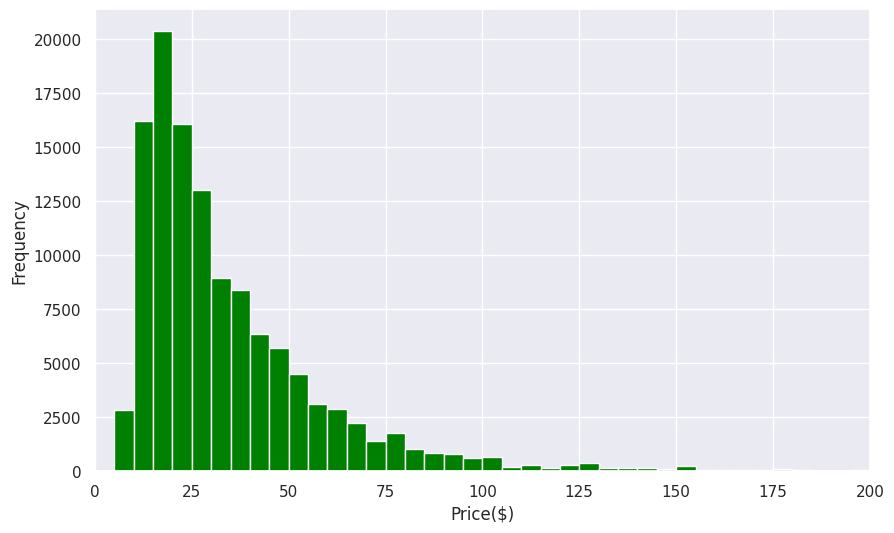

In [ ]:
# plotting price distribution
plt.figure(figsize=(10,6))
bin_edges = np.arange (0, df1['price'].max()+5, 5)
plt.hist(data = df1, x = 'price', bins = bin_edges, color = 'green')
plt.xlim(0,200) # cut the x-axis at 200
plt.xlabel('Price($)')
plt.ylabel('Frequency');

#### Observation #13

Price data is highly skewed to the right. To gain a better understanding of the distribution, I will apply a logarithmic transformation.

In [ ]:

df1['price'].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [ ]:
# Taking numpy log to scale the data
np.log10(df1['price'].describe())

,price
count,5.082480
mean,1.548620
std,1.613114
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


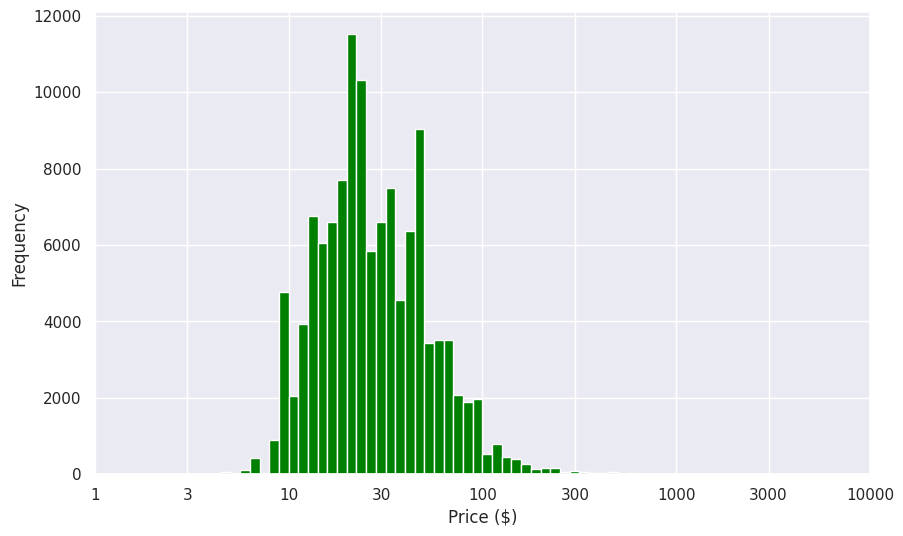

In [ ]:
# plotting price distribution on a log scale
plt.figure(figsize=(10,6))
bin_edges = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data = df1, x = 'price', bins=bin_edges, color = 'green')
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

#### Observation #14

The graph above highlights an approximately log-normal distribution. There is a jump around the 10 dollar mark, and a clear peak at just over 20 dollars. There is another peak at wines priced just over $50.

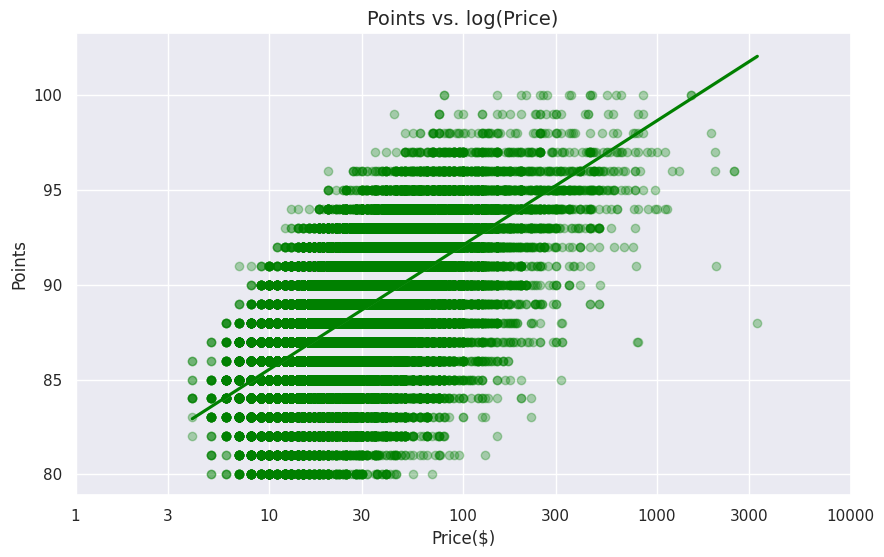

In [420]:
# plotting a scatter plot of relationship between points and price with a log transformation on the price axis
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data=df1, color = 'green', logx = True, scatter_kws={'alpha':0.3})
plt.title("Points vs. log(Price)", fontsize=14)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000], [1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
plt.xlabel("Price($)")
plt.ylabel("Points");

#### Observation #15

there is a positive relationship between points and price, with more expensive wines tending to receive better ratings.

In [ ]:
# the lowest priced wine
df1.loc[df1['price'].idxmin()]

,1987
country,Spain
description,Berry and cherry aromas are surprisingly sturd...
points,85
price,4.0
province,Central Spain
region_1,Vino de la Tierra de Castilla
title,Felix Solis 2013 Flirty Bird Syrah (Vino de la...
variety,Syrah
winery,Felix Solis


In [ ]:
# the highest priced wine
df1.loc[df1['price'].idxmax()]

,80290
country,France
description,This ripe wine shows plenty of blackberry frui...
points,88
price,3300.0
province,Bordeaux
region_1,Médoc
title,Château les Ormes Sorbet 2013 Médoc
variety,Bordeaux-style Red Blend
winery,Château les Ormes Sorbet


In [ ]:
pd.options.display.max_colwidth = 500

In [ ]:
df1[df1['price']==df['price'].min()][:1]

,country,description,points,price,province,region_1,title,variety,winery
1987,Spain,"Berry and cherry aromas are surprisingly sturdy and clean. Freshness is maintained on the palate, which is honest enough to offer modest tannic bite. Lightly spiced plum and raspberry flavors change little on an easy finish.",85,4.0,Central Spain,Vino de la Tierra de Castilla,Felix Solis 2013 Flirty Bird Syrah (Vino de la Tierra de Castilla),Syrah,Felix Solis


In [ ]:
df1[df1['price']==df['price'].max()]

,country,description,points,price,province,region_1,title,variety,winery
80290,France,"This ripe wine shows plenty of blackberry fruits balanced well with some dry tannins. It is fresh, juicy with plenty of acidity, For a light vintage, it's perfumed, full of fresh flavors and will be ready to drink from 2017.",88,3300.0,Bordeaux,Médoc,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


### 2.3. Are certain varieties of Wine of Better Quality on Average?

Let's now compare the top 20 wine types and see how they score.

In [ ]:
# top 20 wines by count
df1.variety.value_counts()[:20]

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


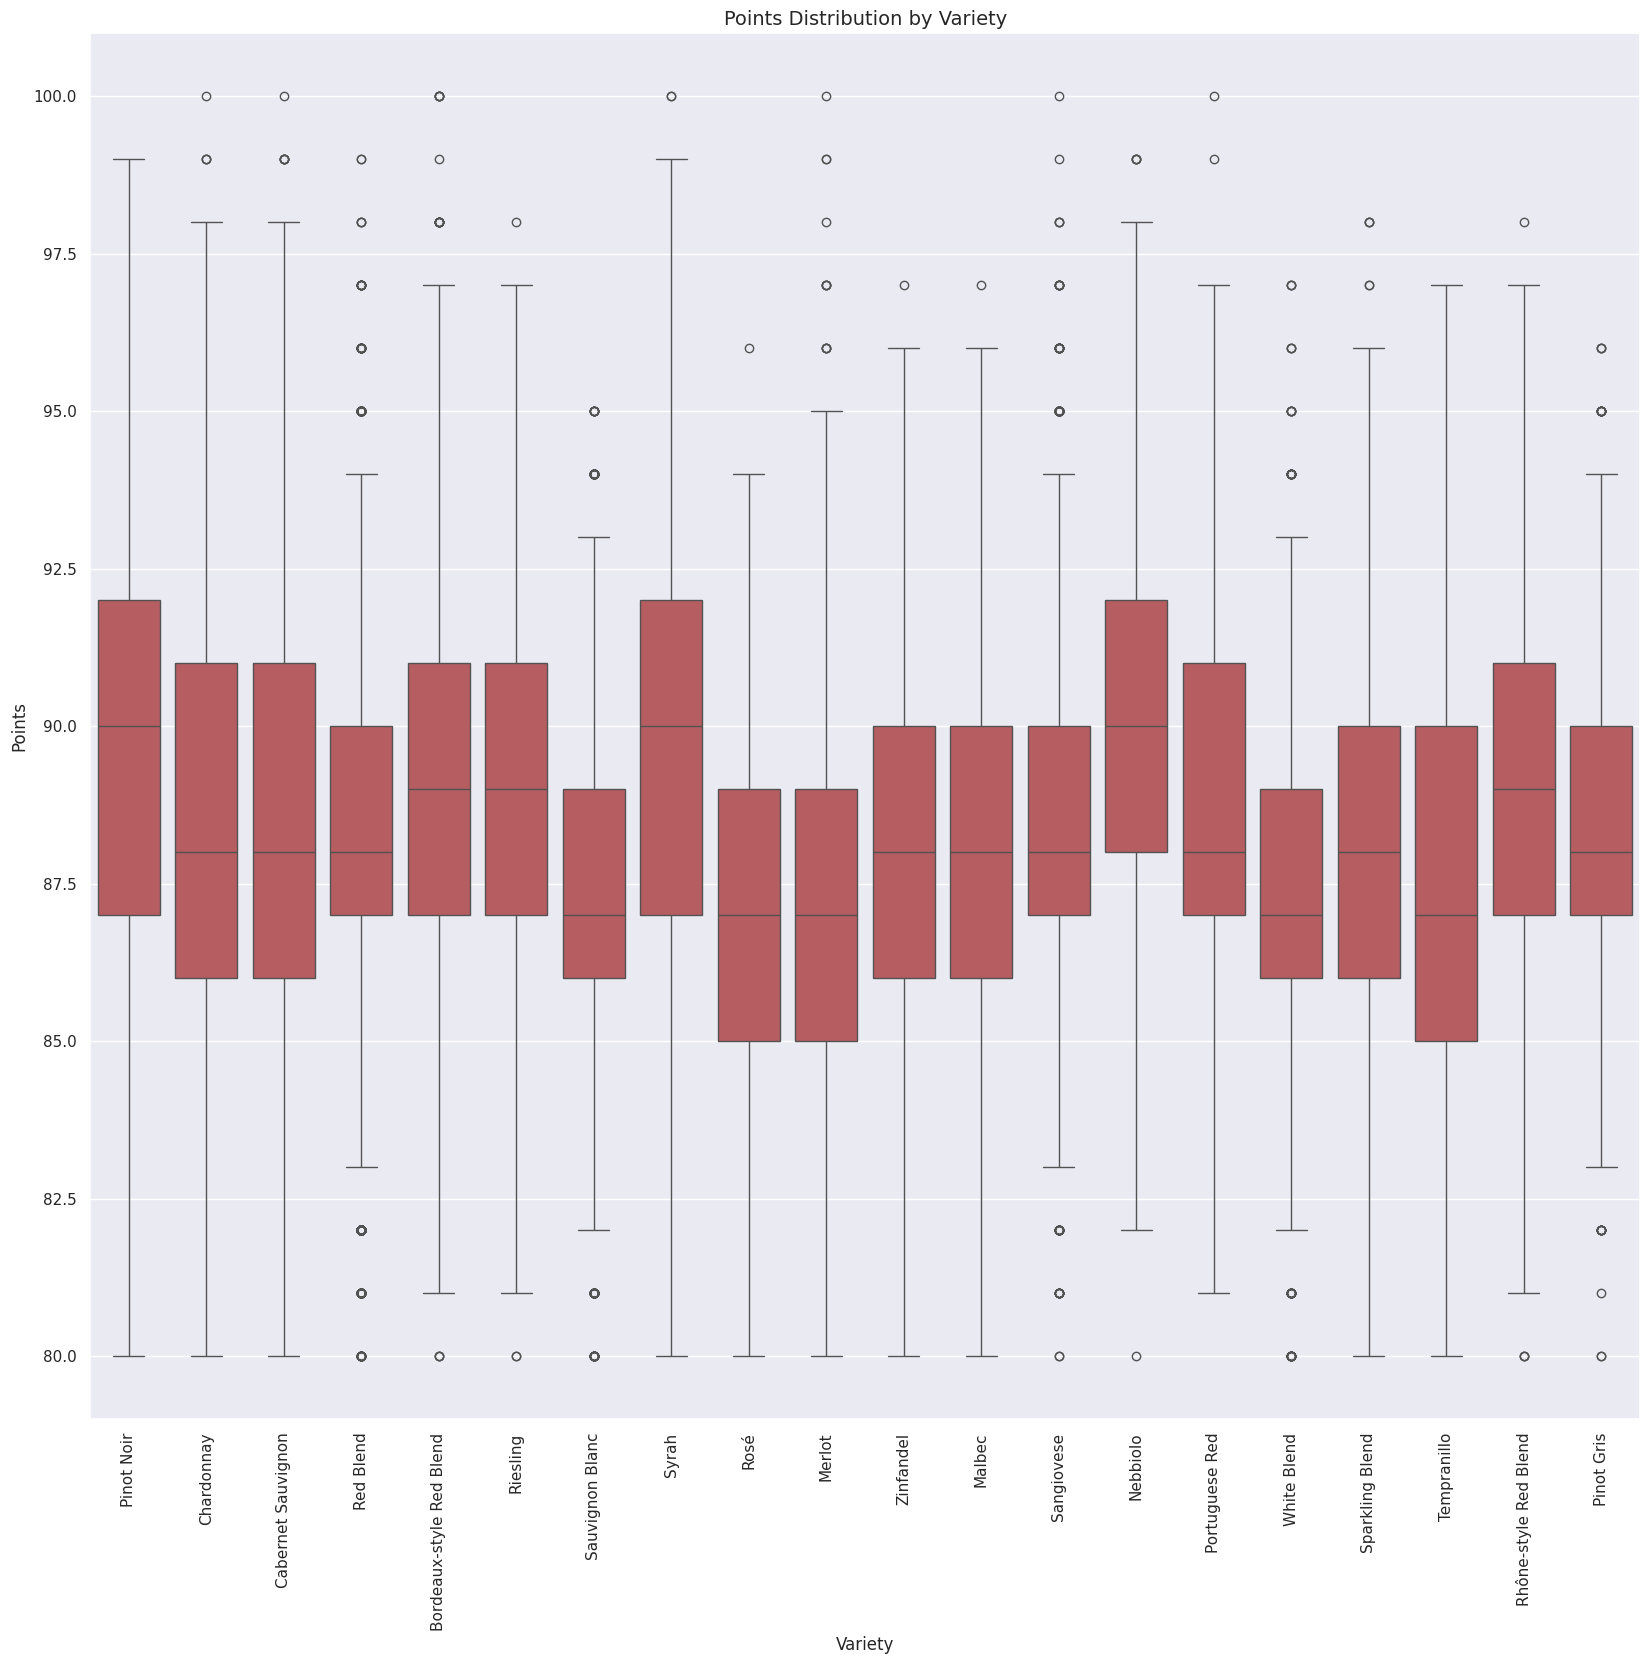

In [ ]:
# boxplot of the top 20 most frequent wines in dataset by points scored
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[3]
sns.boxplot(data = df1, x = 'variety', y = 'points', color = base_color, order = df1.variety.value_counts().iloc[:20].index)
plt.title('Points Distribution by Variety', fontsize = 14)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=90);

#### Observation #16

***Pinot Noir*** tends to perform the best with the highest average score.

### 2.4. Best Wine in Each Price Bracket?

We now understand that quality is linked to price, but we can't all afford to spend $3000 on a bottle of wine every week, so let's look at how to get the most bang for your buck in each price range.

##### 2.4.1. **Scenario 01**: Best wine for a peaceful night in when there is no one to impress and you simply want a fine bottle that won't break the wallet.
Price range: under $11.

In [ ]:
cheap = df1[df1['price']<=11]
len(cheap) # total 8335 options

8335

In [ ]:
# Top 10 cheap wines
cheap.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery
128010,US,"A classic Washington tasting-room Riesling—only better. Opulent and fruity, with apricots, star anise, mint, a very nice spicy streak that lifts it up, and adds a lot of complexity. Smooth and supple, it coats the palate, captures some floral highlights, even a bit of marshmallow.",92,11.0,Washington,Columbia Valley (WA),Pacific Rim 2009 Riesling (Columbia Valley (WA)),Riesling,Pacific Rim
56899,Portugal,"This lightly wood-aged wine is slightly austere in style, with plum and blackberry tones providing weight. Some tannins and acidity accompany its fine, fruity core, giving a more serious note to this wine. Drink from 2018.",92,11.0,Dão,NaN,Pedra Cancela 2010 Seleção do Enólogo Red (Dão),Portuguese Red,Pedra Cancela
29236,Portugal,"Mainly Touriga Nacional with 30% Cabernet Sauvignon, this is a structured wine. The perfumes of the Touriga are balanced by the tannins of the Cabernet to give a wine that's dense and firmly full in the mouth. Wood-aged, it has stylishness and a good promise for aging. Drink from 2018.",92,11.0,Bairrada,NaN,Aveleda 2011 Follies Fonte Nossa Senhora da Vandoma Touriga Nacional-Cabernet Sauvignon (Bairrada),Touriga Nacional-Cabernet Sauvignon,Aveleda
26101,US,"With full ripeness, density and concentration, this keeps its superb balance at just 10.8% alcohol and 5% residual sugar. The dynamic tension plays out beautifully, and doesn't veer into any sort of sugary slackness. This has the sort of weight and complexity you would expect in a $30 wine.",91,8.0,Washington,Columbia Valley (WA),Snoqualmie 2006 Winemaker's Select Riesling (Columbia Valley (WA)),Riesling,Snoqualmie
40258,US,"This contends for the best $10 Riesling in the country. It's off dry, with 30g/L of residual sugar, but not too sweet for some Asian noodle entrées. The mouthfeel is thick and borders on syrupy, with penetrating flavors of mango, papaya and peaches. It could also be served after dinner with fruit and soft cheeses.",91,10.0,Oregon,Willamette Valley,Lujon 2015 Riesling (Willamette Valley),Riesling,Lujon
43344,US,"This contends for the best $10 Riesling in the country. It's off dry, with 30g/L of residual sugar, but not too sweet for some Asian noodle entrées. The mouthfeel is thick and borders on syrupy, with penetrating flavors of mango, papaya and peaches. It could also be served after dinner with fruit and soft cheeses.",91,10.0,Oregon,Willamette Valley,Lujon 2015 Riesling (Willamette Valley),Riesling,Lujon
11955,Portugal,"A firm wine, based on dry tannins and some dense fruit. It has acidity, driven by black berry flavors. The core of the wine is dry, both from wood and acidity, and it will benefit from 2–3 years' aging.",91,10.0,Douro,NaN,Quinta do Portal 2007 Mural Reserva Red (Douro),Portuguese Red,Quinta do Portal
91764,France,"This is a wine that, unlike many Muscadets, can age well. Although only three years old, it will likely go for several more. That comes from the depth of the fruit, the ripe spice and acidity and the rounded white fruits. So drink now and until 2022.",91,10.0,Loire Valley,Muscadet Sèvre et Maine,Chateau de l'Oiselinière 2014 Les Grands Gâts Sur Lie (Muscadet Sèvre et Maine),Melon,Chateau de l'Oiselinière
122119,US,"A tower of tannin shapes this deep-colored and ripely fruity wine into an awesome drink. Layers of fine tannins pile up to make a firm, thick texture that supports lots of deep berry flavors and cleans the palate as you sip. It will make a good match with grilled and roasted beef, lamb or game.",91,11.0,California,California,Bogle 2013 Petite Sirah (California),Petite Sirah,Bogle
43977,US,"Kudos to Ste. Michelle for accurately labeling this wine, and also for the Riesling sweetness scale on the back of all their Rieslings. Firm Yakima Valley fruit is the backbone here, tart and spicy, with bright flavors of pear and apple. A juicy, palate-cleansing style.",91,9.0,Washington,Columbia Valley (WA),Chateau 

##### 2.4.2. **Scenario 02**: Best wine to bring to a close circle dinner party or as a gift. Price range: $12-25.

In [ ]:
low_mid = df1.query("price > 12 and price <=25")
low_mid.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery
101580,US,"Superb fruit highlights this tight, sculpted Syrah. It's extremely dense, with deep and intense raspberry and cassis fruit flavor, augmented with coffee grounds, smoke and iron filings. Complex, detailed, balanced and deep—what more can a wine give you? This is drinking very young and surely needs to be decanted. But already displaying amazing power.",96,20.0,Washington,Columbia Valley (WA),Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,Rulo
15196,France,"The home vineyard of Madiran's star, Alain Brumont, has yielded a superb wine that is full of dark tannins and with a considerable ability to age. It is balanced, concentrated and touched by spice and toastiness from the wood aging. In tandem with that are generous fruits within a dense structure that is just beginning to smooth out. Drink from 2018–2038.",95,20.0,Southwest France,Madiran,Alain Brumont 2010 Château Bouscassé Red (Madiran),Red Blend,Alain Brumont
45814,US,"Among McCrea's Rhône-inspired white wines, this is the most complete and complex. It's rich and dense, with honeycomb, lychee, lemon rind, pineapple and lots of stone—lovely and lingering. It seems to gain strength as it rolls through a sensational finish.",95,25.0,Washington,Yakima Valley,McCrea 2008 Boushey Vineyard Sirocco Blanc White (Yakima Valley),White Blend,McCrea
45807,US,"Beautifully floral, fragrant and evocative, with lush and complex aromas of honeycomb, cracker and citrus, carrying into the mouth with rich, bright, detailed flavors. Stone and mineral elements are woven throughout, and the barrel fermentation adds hints of toast.",95,25.0,Washington,Columbia Valley (WA),Buty 2008 Sémillon-Sauvignon-Muscadelle Semillon-Sauvignon Blanc (Columbia Valley (WA)),Semillon-Sauvignon Blanc,Buty
101586,US,"Massively fruity and oaky, this is an atom bomb of a Chardonnay. You either love this style or you hate it. The pineapple tart, apricot, pear, peach, crème brûlée, buttered toast, vanilla cream and cinnamon spice flavors go on and on. Beyond the utter richness is firm acidity and a bracing minerality. Defines California-style decadence, but drink now, as the wine will quickly go downhill.",95,25.0,California,Santa Barbara County,Au Bon Climat 2007 Los Alamos Vineyard Chardonnay (Santa Barbara County),Chardonnay,Au Bon Climat
126242,US,"With residual sugar at about 1.35%, this balances the acidity without seeming sweet. Hand-picked and whole-cluster pressed, this immaculate, fresh, generous and stylish Riesling is always at the top of the list of Washington's best. Loaded with grapefruit, citrus and stone flavors, it cleans the palate and piles on the details as it rolls into a finish that lingers for well over a full minute.",95,20.0,Washington,Columbia Valley (WA),Poet's Leap 2009 Riesling (Columbia Valley (WA)),Riesling,Poet's Leap
5011,US,"Truly stunning, the Lewis Estate Riesling from Dunham explodes with fragrant fruits—citrus, melon and tropical. A symphony of subtle accents, such as powdered sugar, candied citrus peel and breakfast tea, this gorgeous bottle belongs with the short list of the very best of Washington's many Rieslings.",95,20.0,Washington,Columbia Valley (WA),Dunham 2010 Lewis Estate Vineyard Riesling (Columbia Valley (WA)),Riesling,Dunham
104198,US,"Alcohol that reaches these levels is often a complexity killer, but not here. This is a stunningly delicious wine, with ripe, powerful and concentrated black fruits. Baking spices, tar, pencil lead, even a whiff of compost all add to the complexity and the depth of flavor is magnificent. This can age at least a decade but is delicious already!",95,25.0,Washington,Columbia Valley (WA),Southard 2010 Whipping Boy Cabernet Sauvignon (Columbia Valley (WA)),Cabernet Sauvignon,Southard
76570,US,"Spectacular is the word that comes to mind here. Tasted over many hours, this stunning effort proved itself over and over. A mix of citrus oils, tree fruits, a hint of ho

##### 2.4.3. **Scenario 03**: Got a date in a fancy restaurent with your crush finally who is also most beautiful girl in the college. You want to make a long lasting impression ;) Price range: $26-50.

In [ ]:
mid = df1.query("price >= 26 and price <=50")
mid.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery
118059,US,"Shows classic, full-throttle notes of tropical and citrus fruits, pears and sweet green apples, combined with strong minerality and complex layers of buttered toast, honey and creamy lees. The description alone hardly does justice to the wine's beauty. The acidity is perfect, the oak deftly applied, the finish long and completely satisfying. Winemaker Ehren Jordan suggests pairing it with simple fare like roast chicken and salted fingerling potatoes.",99,44.0,California,Sonoma Coast,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay,Failla
1560,US,"A stunning Pirouette—63% Cabernet Sauvignon, 22% Merlot, 9% Cab Franc and 6% Petit Verdot. Full and magnificently rich, it is loaded with dense and thrilling fruit flavors of black cherry and cassis. A streak of iron and a hint of citrus keep the wine evolving through a long, beautifully balanced finish. Retasted after being open for 24 hours, the wine was as fresh and thrilling as on the first day.",98,50.0,Washington,Columbia Valley (WA),Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend,Pirouette
114981,US,"A seriously top of the heap California Syrah. This complex, interesting wine sings of black pepper and garrigue, fleshy in just-ripe cherry, leather and dark plum. From the mountainous Fenaughty Vineyard, always a good source, it finishes long and will age gorgeously if you can possibly wait to drink it; that pepper will mellow in interesting ways.",97,35.0,California,El Dorado,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah,Donkey & Goat
125831,US,"The cold and fog actually helped this Chardonnay, which achieves a remarkable delicacy and tartness despite the power of its fruit. Really remarkable for the flood of golden mango, Asian pear and Key lime pie richness, which is grounded by a firm minerality. Oak influence and aging on the lees lend the perfect touches of smoky, buttered toast and zesty creaminess to this dry, polished wine. A mere 587 cases were produced.",97,50.0,California,Green Valley,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay,Dutton-Goldfield
16524,Portugal,"This is a superb blend of aged tawny Ports, blended to celebrate the company's 325th anniversary. Filled with rich fruit, it has great depth and spicy richness although it is also impressively fresh. Dried fruits and red plums are lifted with a hint of smoky wood and good acidity. Like any tawny Port, it is ready to drink.",97,40.0,Port,NaN,Taylor Fladgate NV 325 Anniversary (Port),Port,Taylor Fladgate
128268,US,"A monumental Cabernet that succeeds on every level. It's deep, dark and ultrarich, showing massive blackberries, black currants, dark chocolate, violets, minerals and a touch of sweet, smoky oak. Beyond the flavors is the dramatic structure, with fabulously ripe, dense tannins and a bone-dry, long finish. Surely a tremendous wine capable of long-term aging. Try 2012–2018, at least.",97,50.0,California,Oak Knoll District,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon,Trefethen
47432,US,"This wine shows real first-growth quality in its intensity and concentration, with orange nectar, golden mango, pear, peach pie, buttercream, vanilla, buttered toast and spice flavors. The balance is exquisite, and the way the acids dance along the palate make the wine clean and lively.",97,50.0,California,Russian River Valley,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay,Williams Selyem
4504,US,"This wine is insanely good, from a dry-farmed, yes, rocky outcropping of vines planted first in 1910, then again in 1934 and the 1970s, with Carignane and Petite Sirah in the mix. It's thick, rich and beautifully put-together, full bodied and entirely balanced, with markings of cherry cordial and white pepper that seduce gently.",97,50.0,California,Russian River Valley,Limerick La

##### 2.4.4. **Scenario 04**: Wine is your life and money is just way to be happy, Price Range: Above $50

In [ ]:
high = df1.query("price > 50")
high.sort_values(by='points', ascending=False)[:20]

,country,description,points,price,province,region_1,title,variety,winery
113929,US,"In 2005 Charles Smith introduced three high-end Syrahs. In 2006 Smith has made a wine better than each of these, by combining them into a single wine—Royal City Syrah. Rich scents of purple fruit, smoked meat, cedar, lead pencil, moist earth and so on proclaim a wine with genuine gravitas. There is nothing missing, from the first sniff to the last sip, the wine delivers on all levels. Complex, beautifully balanced, powerful and detailed.",100,80.0,Washington,Columbia Valley (WA),Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah,Charles Smith
111755,France,"This is the finest Cheval Blanc for many years. It is, quite simply, magnificent. The wine shows the greatness of Cabernet Franc in the vintage, with 57% of the variety in the blend. It is beautifully structured and perfumed, with velvety tannins, balanced acidity and swathes of black-currant and black-cherry fruits. It's well on course to becoming a legendary wine.",100,1500.0,Bordeaux,Saint-Émilion,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
89728,France,"This latest incarnation of the famous brand is a superb wine. It is on par with, maybe even better than, the already legendary 2002. Its balance is impeccable: Apple and citrus flavors working with the tight minerality to give a textured yet fruity wine. Produced from Roederer's own vineyards which are mainly biodynamic, the wine has its own intense purity and crispness. It has amazing potential and is likely to age for many years. Drink from 2020.",100,250.0,Champagne,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend,Louis Roederer
123545,US,"Initially a rather subdued Frog; as if it has been tamed down. Then, suddenly, There's a plush core of blackberry fruit, and the classic Cayuse funkiness is there, drenched in liquid rocks and cured meat and drying tannins. It's all in proportion and a fine reflection of the steely vintage. As it opens gracefully you discover that it is a stunningly refined Frog, quite possibly the best ever; powerful and distinctive, but also elegant, feminine.",100,80.0,Washington,Walla Walla Valley (WA),Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah,Cayuse
118058,US,"This wine dazzles with perfection. Sourced from vineyards throughout Sonoma County, it refutes the belief that a great Cabernet must come from a single vineyard. It does not. The master's art of blending, coupled with demanding vineyard practices lends completeness. The blend is 85% Merlot, 10% Cabernet Franc and 5% Malbec, making it an extraordinary success despite the absence of Cabernet Sauvignon. Give credit to winemaker Pierre Seillan. The wine itself is absolutely dry. It starts with a...",100,450.0,California,Sonoma County,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité
89729,France,"This new release from a great vintage for Chardonnay in Champagne is a perfect blanc de blancs, showing a wealth of intensity from the crisp, chalky, mineral tones to the perfumed apple notes. The aromas hint at developing toastiness that adds depth and complexity. The wine is still young and it will age for years. Drink from 2020.",100,617.0,Champagne,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay,Salon
45781,Italy,"This gorgeous, fragrant wine opens with classic Sangiovese scents of violet, rose, perfumed red berry, new leather and a whiff of baking spice. The elegant, radiant palate delivers crushed Marasca cherry, ripe strawberry, cinnamon, black tea and a hint of pipe tobacco. Firm, ultrafine tannins and bright acidity offer an age-worthy structure and impeccable balance. It's already stunning but will evolve for decades. Drink 2020–2050.",100,550.0,Tuscany,Brunello di Montalcino,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese,Biondi Santi
111753,France,"Almost black in color, this stu

### 2.5. What words are most used when describing wine​?

This [wordcloud-tutorial](https://www.datacamp.com/tutorial/wordcloud-python) from datacamp and [tutorial-02](https://regenerativetoday.com/generate-word-clouds-of-any-shape-in-python/) is used to create the below word cloud.

In [ ]:
# start with one review
review = df1.description[1]
review

"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016."

In [ ]:
reviews = " ".join(review for review in df1.description)
print ("There are {} words in the combination of all review.".format(len(reviews)))

There are 29653210 words in the combination of all review.


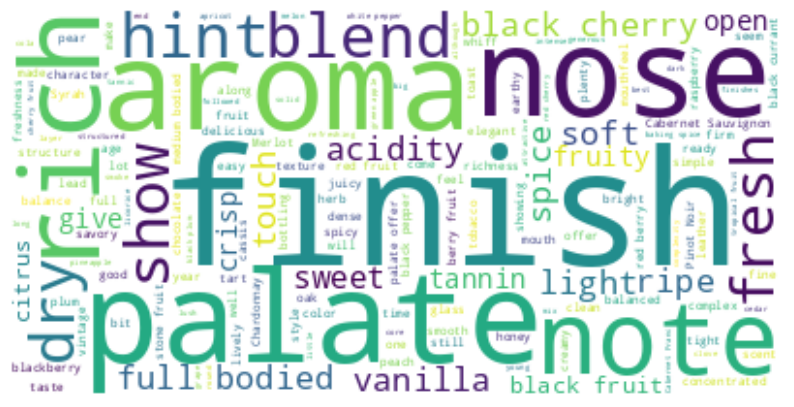

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(reviews)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now, I would like to put this word cloud into the shape of a wine glass and wine bottle with an image taken from https://www.datacamp.com/community/tutorials/wordcloud-python. First I need to check the numpy array form.

In [ ]:
# source: https://www.datacamp.com/community/tutorials/wordcloud-python
# to make sure the mask works by looking at numpy array form:
wine_mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/MyData/wine_mask_xgk1tq.png"))
wine_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

For the masking function to work, all the white parts of the mask should be 255 not 0 (int type). Values of 255 are white and values of 1 are black. The function below transforms the mask by swapping 0 for 255.

In [ ]:
def transform_format(val):
    """Converts int 0 input to int 255. Else returns input."""
    return np.where(val == 0, 255, val)

In [ ]:
# check docstring works properly
print(transform_format.__doc__)

Converts int 0 input to int 255. Else returns input.


Then a new mask is created with the same shape as the mask and the transform_format function is applied to each value in each row of the previous mask.

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = transform_format(wine_mask)

In [ ]:
# Check the expected result of the mask
transformed_wine_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

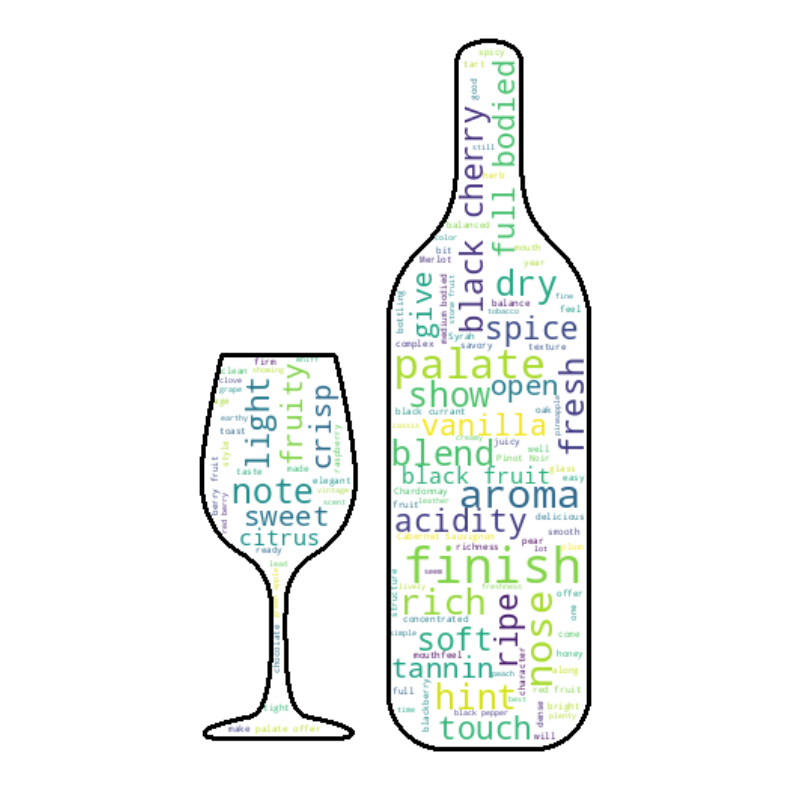

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='black')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Conclusions
1. England produces excellent wine, on average. But if you want a bottle with a perfect score of 100, seek to the usual suspects: France, Italy, Portugal, the United States, and Australia.
2. Price is tied to quality. However, if you know where to look, you can get a $4 wine that is only 3 points less than a $3300 bottle.
3. All wine kinds are fair game, but I'm betting on Pinot Noir.
4. There is a wine for every occasion and budget, with definite standouts in each category.
5. Certain words appear frequently in wine evaluations. Vinojargon, like any other language, is learnable.


So, go ahead and drink! I believe you will do it differently today.

To communicate with public about the results of this analysis were written up in a [medium blog](https://medium.com/@aghoshpro/sip-script-a-data-driven-journey-through-the-world-of-wine-d9d05d6dcf4e)

# References

https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv     
https://www.wine-searcher.com/critics-17-wine+enthusiast       
https://www.winemag.com    
https://stackoverflow.com/questions/37683558/pandas-extract-number-from-string      
https://towardsdatascience.com/beautify-coronavirus-bar-charts-ac636d314d98      
https://stackoverflow.com/questions/33005872/seaborn-regplot-partially-see-through-alpha     
http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot     
https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot    
https://www.datacamp.com/community/tutorials/wordcloud-python     
https://stackoverflow.com/questions/20443846/python-pil-nameerror-global-name-image-is-not-defined     
https://www.geeksforgeeks.org/python-docstrings/